Importing libraries used in the project

In [148]:
#Importing libraries ised in the project
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline

import seaborn as sns

# Miscellaneous libraries
import traceback
import math
import datetime


Loading the Loan data

In [149]:
# Import data from CSV file
file_path = '..\dataset\loan.csv'

try:
    loanData = pd.read_csv(file_path, delimiter=',', low_memory=False)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')


Data Load: Successful


In [150]:
# Import data from Excel file
file_path = '..\dataset\Data_Dictionary.xlsx'

try:
    loadDataInfo = pd.read_excel(file_path)
    print('Data Load: Successful')
except FileNotFoundError:
    print(f'Error: File "{file_path}" not found.')
except pd.errors.EmptyDataError:
    print(f'Error: File "{file_path}" is empty.')
except pd.errors.ParserError:
    print(f'Error: Unable to parse data from file "{file_path}". Check the file format.')
except Exception as e:
    traceback.print_exc()
    print(f'Error: An unexpected error occurred while loading data. {str(e)}')
    print('Data Load: Failure')


Data Load: Successful


To Check the number of Rows and Columns of input data. In this case:
+ ROWS: 39717
+ COLUMNS: 111

In [151]:
loanData.shape

(39717, 111)

Displaying the top 10 Rows of data to visually inspect the data.

Below are the obeservation at first glance:
+ Some columns are required to be converted into Int as currently they are String and appending with strings like "%" and "months". Example column "term", "int_rate"
+ Many columns seems to be only NaN value, need to be removed after confirmation.
+ Some of the columns are seems to have same values, which would contributing nothing in analysis and can be removed after confirmation.

In [152]:
loanData.head(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


******************************************************
**********************************************
Displaying the bottom 10 Rows of data to visually inspect the data.

Below are the obeservation at first glance:
+ Some columns are required to be converted into Int as currently they are String and appending with strings like "%" and "months". Example column "term", "int_rate"
+ Many columns seems to be only NaN value, need to be removed after confirmation.
+ Some of the columns are seems to have same values, which would contributing nothing in analysis and can be removed after confirmation.

In [153]:
loanData.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39707,92666,92661,5000,5000,525.0,36 months,9.33%,159.77,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22%,164.23,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


***
***
As mentionsed above we would need to convert some to columns datatype

To do so we are required to have infromation of dataType of all columns

In [155]:
# Check data types of columns
data_types = loanData.dtypes
print("Data Types:")
print(data_types)


Data Types:
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


Displaying full details about dataType for reference

In [156]:

pd.DataFrame(loanData.dtypes).reset_index().style


,index,0
0,id,int64
1,member_id,int64
2,loan_amnt,int64
3,funded_amnt,int64
4,funded_amnt_inv,float64
5,term,object
6,int_rate,object
7,installment,float64
8,grade,object
9,sub_grade,object


***
***
For data analysi check missing value is important as its directly affects the outcome.

From below results it looks like many columns has 100% columns values as NaN and that columns must be removed.

In [157]:

# Check for missing values
missing_values = loanData.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


************
*******
Ploting count vs data type graph

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17800\511019741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dtypes_df['datatype'], palette='viridis')


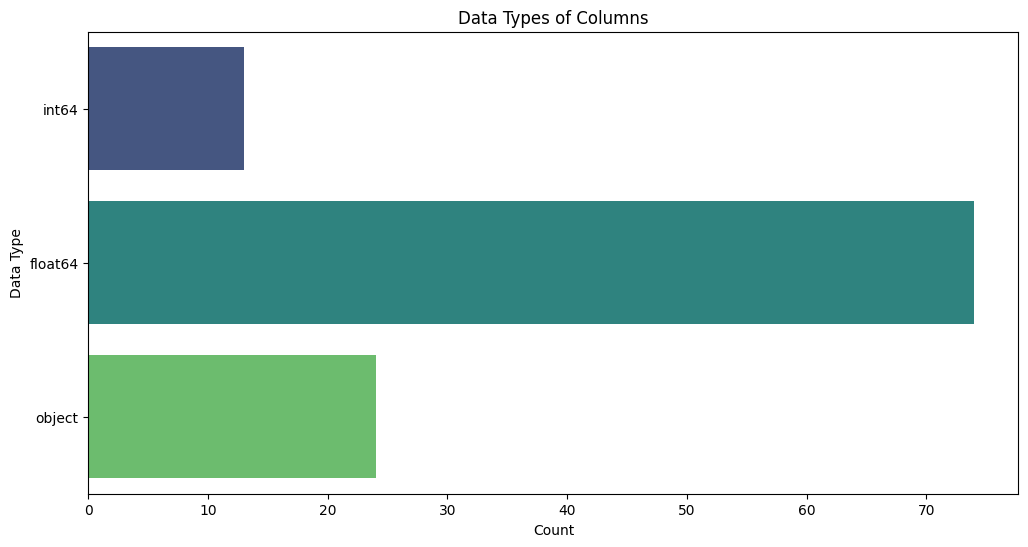

In [158]:

dtypes_df = pd.DataFrame(loanData.dtypes).reset_index().rename(columns={'index': 'variable', 0: 'datatype'})

# Identifying numerical columns
numerical_columns = dtypes_df[dtypes_df['datatype'].isin([np.int64, np.float64])]['variable']

# Creating a bar plot using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=dtypes_df['datatype'], palette='viridis')
plt.title('Data Types of Columns')
plt.xlabel('Count')
plt.ylabel('Data Type')
plt.show()


*****
*******
Describing the data for beter understanding

In [159]:
loanData.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


*****
*******
Diplaying the metata of the Loan data to understand the business meaning of individual columns

In [160]:
# loadDataInfo is a DataFrame containing columns 'LoanStatNew' and 'Description'
loadDataInfo[['LoanStatNew', 'Description']].style.apply(lambda x: ['background-color: lightblue' if val == 'example_value' else '' for val in x], axis=1)


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


***
***
As number of columns present in the data is 111, which is not matching with rows given the data info. 

There for displaying missing columns

In [161]:
# Identify variables present in the data dictionary but missing in the loan dataset
columnsMissingInData = loadDataInfo[~loadDataInfo['LoanStatNew'].isin(loanData.columns)][['LoanStatNew', 'Description']]

# Display the variables that are listed in the data dictionary but missing in the 'loan' dataset
columnsMissingInData.style.set_caption("Variables present in the data dictionary but missing in the 'loan' dataset")


,LoanStatNew,Description
21,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
22,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
37,last_fico_range_high,The upper boundary range the borrower’s last FICO pulled belongs to.
38,last_fico_range_low,The lower boundary range the borrower’s last FICO pulled belongs to.
110,total_rev_hi_lim,Total revolving high credit/credit limit
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"
115,nan,nan
116,nan,* Employer Title replaces Employer Name for all loans listed after 9/23/2013


******
*******
To Analyse the data it is important that we have insights about each columns.

To make the analysis consise, method is written to generate the state of all the columns at once.

Below method takes dataframe as input and results in another dataframe where all the columns converted to row and value filled with insights.

In [162]:
def get_statistics_of_data(df):
    # Initialize an empty DataFrame to store the summary
    summary_df = pd.DataFrame()

    # Iterate through each column in the input DataFrame
    for i, column in enumerate(df.columns):
        # Store the variable name in the summary DataFrame
        summary_df.loc[i, 'Variable'] = column

        # Record the data type of the variable
        summary_df.loc[i, 'Data Type'] = df[column].dtype

        # Count the number of missing values in the variable
        summary_df.loc[i, 'Null Count'] = df[column].isna().sum()

        # Count the number of duplicate values in the variable
        summary_df.loc[i, 'Duplicate Count'] = df[column].duplicated().sum()

        # Record the total count of non-null values in the variable
        summary_df.loc[i, 'Total Count'] = df[column].describe()['count']

        # For numerical variables, tabulate additional descriptive statistics
        if df[column].dtype in ['int64', 'float64']:
            summary_df.loc[i, 'Mean'] = df[column].describe()['mean']
            summary_df.loc[i, 'Std Dev'] = df[column].describe()['std']
            summary_df.loc[i, 'Min'] = df[column].describe()['min']
            summary_df.loc[i, '25%'] = df[column].describe()['25%']
            summary_df.loc[i, '50%'] = df[column].describe()['50%']
            summary_df.loc[i, '75%'] = df[column].describe()['75%']
            summary_df.loc[i, 'Max'] = df[column].describe()['max']
            summary_df.loc[i, 'Unique Values of numbers'] = df[column].nunique()

        # For categorical variables, tabulate unique values, most frequent value, and its frequency
        elif df[column].dtype == 'object':
            summary_df.loc[i, 'Unique Values of String'] = df[column].nunique()
            summary_df.loc[i, 'Top Value'] = df[column].describe()['top']
            summary_df.loc[i, 'Frequency'] = df[column].describe()['freq']

    return summary_df


In [163]:
loadDataWithStatistics = get_statistics_of_data(loanData)
loadDataWithStatistics.style

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values of numbers,Unique Values of String,Top Value,Frequency
0,id,int64,0.000000,0.000000,39717.000000,683131.913060,210694.132915,54734.000000,516221.000000,665665.000000,837755.000000,1077501.000000,39717.000000,nan,nan,nan
1,member_id,int64,0.000000,0.000000,39717.000000,850463.559408,265678.307421,70699.000000,666780.000000,850812.000000,1047339.000000,1314167.000000,39717.000000,nan,nan,nan
2,loan_amnt,int64,0.000000,38832.000000,39717.000000,11219.443815,7456.670694,500.000000,5500.000000,10000.000000,15000.000000,35000.000000,885.000000,nan,nan,nan
3,funded_amnt,int64,0.000000,38676.000000,39717.000000,10947.713196,7187.238670,500.000000,5400.000000,9600.000000,15000.000000,35000.000000,1041.000000,nan,nan,nan
4,funded_amnt_inv,float64,0.000000,31512.000000,39717.000000,10397.448868,7128.450439,0.000000,5000.000000,8975.000000,14400.000000,35000.000000,8205.000000,nan,nan,nan
5,term,object,0.000000,39715.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,36 months,29096.000000
6,int_rate,object,0.000000,39346.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,nan,371.000000,10.99%,956.000000
7,installment,float64,0.000000,24334.000000,39717.000000,324.561922,208.874874,15.690000,167.020000,280.220000,430.780000,1305.190000,15383.000000,nan,nan,nan
8,grade,object,0.000000,39710.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,nan,7.000000,B,12020.000000
9,sub_grade,object,0.000000,39682.000000,39717.000000,nan,nan,nan,nan,nan,nan,nan,nan,35.000000,B3,2917.000000


***
***
##                         *** DATA CLEANING ***

## Stratagy for data cleaning and for further analysis.

## About Columns
+ Drop the columns where all the values are null.
+ Drop the columns where 60% of the value are null.
+ Drop the columns where all the values are same, as there no variant to anlyse for the columns.
+ Drop the columns like primary keys, as "id" and "member_id" in this case.
+ Drop  one of the columns from pair of columns which holds the same/simlar values, like in this case "funded_amnt" and "funded_amnt_invt".
+ Drop the columns which are related to post load approval, as these column will not be available for new loan applicant.
+ Drop the columns whoese values can not be consider for analysis like in this case "desc".

## About Rows
+ Drop the rows where status of load "load_status" value is "current", as these records does not conclude the outcome.
+ Drop the rows where values are Outilier as they may impact the averall analysis.




****
***
Droping the columns where more then 60% of values are null.

In [164]:
# Calculate the percentage of null values in each column
null_percentage = (loanData.isna().sum() / loanData.shape[0]) * 100

# Set the threshold for null values to 60%
null_threshold = 60

# Identify columns with null values exceeding the threshold
cols_to_drop = null_percentage[null_percentage > null_threshold].index

# Drop the identified columns with high null values
loanData.drop(cols_to_drop, axis=1, inplace=True)


***
***
Checking the shape of the data again to see how many columns dropped.
As from below results, is can be seen that numner of columns reduces from 111 to 54

In [165]:
# Get the shape of the loan_df DataFrame
loanData.shape

(39717, 54)

****
****
Once again lets have a look on data insightes for columns where the values are same. i.e. one value is present in all the rows.

Such columns should be dropped as there are no variant to analyise.

In [166]:
loanDataInsights = get_statistics_of_data(loanData)
loanDataInsights

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values of numbers,Unique Values of String,Top Value,Frequency
0,id,int64,0.0,0.0,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06,39717.0,NaN,nan,NaN
1,member_id,int64,0.0,0.0,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06,39717.0,NaN,nan,NaN
2,loan_amnt,int64,0.0,38832.0,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04,885.0,NaN,nan,NaN
3,funded_amnt,int64,0.0,38676.0,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04,1041.0,NaN,nan,NaN
4,funded_amnt_inv,float64,0.0,31512.0,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04,8205.0,NaN,nan,NaN
5,term,object,0.0,39715.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,36 months,29096.0
6,int_rate,object,0.0,39346.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10.99%,956.0
7,installment,float64,0.0,24334.0,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03,15383.0,NaN,NaN,NaN
8,grade,object,0.0,39710.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,B,12020.0
9,sub_grade,object,0.0,39682.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,B3,2917.0


***
***
Droping the columns whoese values are same across all the rows, i.e no variant

In [167]:

# Identify columns where all the value are same or no variant in data
cols_to_drop = loanDataInsights[(loanDataInsights["Unique Values of numbers"] == 1) | ((loanDataInsights["Unique Values of String"] == 1))]['Variable']

# Drop the columns
print(cols_to_drop)
loanData.drop(cols_to_drop, axis=1, inplace=True)

17                    pymnt_plan
33           initial_list_status
46    collections_12_mths_ex_med
47                   policy_code
48              application_type
49                acc_now_delinq
50      chargeoff_within_12_mths
51                   delinq_amnt
53                     tax_liens
Name: Variable, dtype: object


Lets check the size again.

As it is visible the around 9 columns are droped

In [168]:
loanData.shape

(39717, 45)

***
***
Droping the columns where values are primary key.

As per data analysis below columns looks like primary key:
+ id
+ member_id

In [169]:
loanData.drop(["id", "member_id"], axis=1, inplace=True)

***
***
Lets Check the size again.
As it is visible 2 columns are dropped

In [170]:
loanData.shape

(39717, 43)

***
***
Droping the columns which can not be considered for analysis as in this scope.

Such columns are:
+ emp_title - As this column is replacement of Employment and does not signifies much. So can be dropped.
+ url - As name suggest, this column has url for each customer and does not signifies much or might be generated post aproval
+ desc - This is desc column and analysis it is out of scope for now.
+ title - This column is a sub columns of purpose column, similar infomations are present.
+ zipCode - As the data is masked, can not be used for analysis.
+ addr_state - Out of scope as of now.


In [171]:
colums_to_remove_as_out_of_scope = ["emp_title", "url", "desc", "title", "zip_code", "addr_state"]

loanData.drop(colums_to_remove_as_out_of_scope, axis=1, inplace=True)

****
****
Lets check the size of data again.

6 more columns dropped

In [172]:
loanData.shape

(39717, 37)

***
***
Droping the columns which are generated post aproval for the loan, there for can not considered for analysis for aplicants.

Such columns are:
+ funded_amnt - Amount assigned after aproval.
+ funded_amnt_inv - Amount assigned after aproval.
+ issue_d - Date after column after loan aproval
+ out_prncp - generated post aproval.
+ out_prncp_inv - generated post approval.
+ total_pymnt - generated post approval.
+ total_pymnt_inv - generated post approval.
+ total_rec_prncp - generated post approval.
+ total_rec_int - generated post approval.
+ total_rec_late_fee - generated post approval.
+ recoveries - generated post approval.
+ collection_recovery_fee -generated post approval.
+ last_pymnt_d - generated post approval.
+ last_pymnt_amnt - generated post approval.
+ last_credit_pull_d - generated post approval.




In [173]:
post_approval_colums_to_remove = ["funded_amnt", 
"funded_amnt_inv", 
"issue_d", 
"out_prncp", 
"out_prncp_inv", 
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d"
]

loanData.drop(post_approval_colums_to_remove, axis=1, inplace=True)

Lets check the shape again.

***
***
## As this is visible now no. of columns are dropped for 111 to 22 just by going through general strategy of data cleaning


In [174]:
loanData.shape

(39717, 22)

In [175]:
loanDataInsights = get_statistics_of_data(loanData)
loanDataInsights

,Variable,Data Type,Null Count,Duplicate Count,Total Count,Mean,Std Dev,Min,25%,50%,75%,Max,Unique Values of numbers,Unique Values of String,Top Value,Frequency
0,loan_amnt,int64,0.0,38832.0,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.00,15000.00,35000.00,885.0,NaN,nan,NaN
1,term,object,0.0,39715.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,36 months,29096.0
2,int_rate,object,0.0,39346.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,10.99%,956.0
3,installment,float64,0.0,24334.0,39717.0,324.561922,208.874874,15.69,167.02,280.22,430.78,1305.19,15383.0,NaN,NaN,NaN
4,grade,object,0.0,39710.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,B,12020.0
5,sub_grade,object,0.0,39682.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,B3,2917.0
6,emp_length,object,1075.0,39705.0,38642.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,10+ years,8879.0
7,home_ownership,object,0.0,39712.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,RENT,18899.0
8,annual_inc,float64,0.0,34399.0,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.00,82300.00,6000000.00,5318.0,NaN,NaN,NaN
9,verification_status,object,0.0,39714.0,39717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Not Verified,16921.0


## TODO: Below containt is required to be modified.

Certainly, based on these information, here are observations for the variables in the data:

1. **mths_since_last_delinq:**
   - This variable represents the number of months since the borrower's last delinquency.
   - It has a high null percentage of 64.66%.
   - As it is a behavioral variable generated post-approval of the loan and not available during approval, it can be dropped from the analysis.

2. **desc:**
   - The 'desc' variable contains 32.59% null values.
   - Being a string datatype, valuable insights could be extracted using text analytics and NLP techniques.
   - However, due to the high percentage of missing values and considering the scope of this case study, it is advisable to drop this variable from the analysis.

3. **emp_title and emp_length:**
   - 'emp_title' has 6.19% and 'emp_length' has 2.71% null values.
   - These variables represent job title and employment length, respectively.
   - The missing values in these columns are relatively low and can be handled based on further analysis requirements.

4. **pub_rec_bankruptcies, last_pymnt_d, collections_12_mths_ex_med, chargeoff_within_12_mths, revol_util, tax_liens, title, and last_credit_pull_d:**
   - These variables have very low null percentages ranging from 0.18% to 0.005%.
   - The missing values in these columns are minor and can be ignored or dealt with in further analysis based on specific requirements.

Overall, for the variables with high null percentages, it's recommended to drop them from the analysis due to their limited availability or the need for advanced techniques, which are beyond the scope of this case study. For the variables with minor null percentages, handling them in further analysis can be considered based on the specific requirements.

***
***
## Cleaning the Rows

***
***
Removing the row having null values more then 5


In [176]:
rows_with_high_nulls = loanData[loanData.isna().sum(axis=1) > 5].shape[0]
rows_with_high_nulls

0

As seen above we donot have any rows with more then 5 null values 

***

***
***
Dropping all the rows where "loan_status" column have value 'Current'

Records with 'Current' loan status are excluded from the analysis as the customer is still in the process of repaying, making the outcome uncertain.

In [177]:

loanData = loanData[loanData['loan_status'] != 'Current']

# Explanation: 
# Records with 'Current' loan status are excluded from the analysis as the customer is still in the process of repaying, making the outcome uncertain.

# Reset index
loanData.reset_index(drop=True, inplace=True)

## TODO: 
+ Data conversion
    + Object to Int/float
+ Outliers removal

### FULL PAID = 1
### DEFAULTER = 0

In [197]:


# Convert 'loan_status' to integer type
loanData['loan_status'] = loanData['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
loanData['loan_status'] = loanData['loan_status'].apply(lambda x: pd.to_numeric(x))

# Explanation: 
# 'loan_status' is converted to numeric values (1 for 'Fully Paid' and 0 for Defaults) for analysis purposes.




***
***
 Display value counts for 'loan_status'

In [198]:
loanData.loan_status.value_counts()

loan_status
1    32950
0     5627
Name: count, dtype: int64

***
***
# Sectional Assessments: Summary of Individual Column Assessments
Pupose of this assesment to have deep insights about data
+ Columns datatype conversions
+ Outliers removal

In [201]:
columns_to_assess = [
        'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'
]

***
***
Method created to display more insights about data.

In [204]:
def assess_columns(loan_df, columns):
    """Perform visual, programmatic assessments, and display detailed statistics for specified columns."""
    for col in columns:
        print(f"\n{'='*50}\n{'Assessment Summary for'} '{col}'\n{'='*50}")
        
        # Visual assessment
        print(f"Visual Assessment of '{col}'".center(50, '-'))
        print(f"Head:\n{loan_df[col].head()}\n")
        print(f"Tail:\n{loan_df[col].tail()}\n")
        print(f"Sample:\n{loan_df[col].sample(5)}\n")

        # Programmatic assessment
        datatype = loan_df[col].dtype
        null_count = loan_df[col].isnull().sum()
        null_percentage = (null_count / len(loan_df) * 100)
        duplicate_count = loan_df[col].duplicated().sum()

        print(f"Programmatic Assessment of '{col}'".center(50, '-'))
        print(f"Data Type: {datatype}")
        print(f"Null Count: {null_count}")
        print(f"Null Percentage: {null_percentage:.2f}%")
        print(f"Duplicate Count: {duplicate_count}\n")

        # Counts of unique values
        unique_values = loan_df[col].value_counts()
        print(f"Counts of Unique Values for '{col}':\n{unique_values}\n")

        # Descriptive Statistics
        descriptive_stats = loan_df[col].describe().to_frame().transpose()
        print(f"Descriptive Statistics for '{col}':\n{descriptive_stats}\n")



In [205]:

assess_columns(loanData, columns_to_assess)


Assessment Summary for 'loan_amnt'
---------Visual Assessment of 'loan_amnt'---------
Head:
0     5000
1     2500
2     2400
3    10000
4     5000
Name: loan_amnt, dtype: int64

Tail:
38572    2500
38573    8500
38574    5000
38575    5000
38576    7500
Name: loan_amnt, dtype: int64

Sample:
32587     3000
34114    18000
37158     7500
37356     6000
27245    20000
Name: loan_amnt, dtype: int64

------Programmatic Assessment of 'loan_amnt'------
Data Type: int64
Null Count: 0
Null Percentage: 0.00%
Duplicate Count: 37707

Counts of Unique Values for 'loan_amnt':
loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: count, Length: 870, dtype: int64

Descriptive Statistics for 'loan_amnt':
             count         mean          std    min     25%     50%      75%  \
loan_amnt  38577.0  11047.02543  7348.441646  500.0  5300.0  9600.0  15000.0   

               max  
loan

# Sectional Assessments: Summary of Individual Column Assessments

## 1. acc_now_delinq
- **Source:** loan_df
- **Column:** acc_now_delinq
- **Visual Assessment:** None
- **Programmatic Assessment (Issue):** Quality
- **Description:** No issues detected visually. However, programmatically, as the variable has only one value associated with it, it can be dropped from the analysis.

## 2. annual_inc
- **Source:** loan_df
- **Column:** annual_inc
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 3. application_type
- **Source:** loan_df
- **Column:** application_type
- **Visual Assessment:** None
- **Programmatic Assessment (Issue):** Quality
- **Description:** No visual issues, but programmatically, as the variable has only one value associated with it, it can be dropped from the analysis.

## 4. chargeoff_within_12_mths
- **Source:** loan_df
- **Column:** chargeoff_within_12_mths
- **Visual Assessment:** None
- **Programmatic Assessment (Issue):** Quality
- **Description:** No issues detected visually. However, programmatically, as the variable has only one value associated with it and no charge-offs were detected within the span of 12 months for any applicant, it can be dropped from the analysis.

## 5. dti
- **Source:** loan_df
- **Column:** dti
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 6. earliest_cr_line
- **Source:** loan_df
- **Column:** earliest_cr_line
- **Visual Assessment:** Tidiness
- **Programmatic Assessment:** None
- **Description:** Visual assessment suggests the data is in string format. It should be converted to date format. However, since we do not have the day of the month, options include imputing the day to the first of the respective month or extracting month and year into two individual columns.

## 7. emp_length
- **Source:** loan_df
- **Column:** emp_length
- **Visual Assessment:** Tidiness
- **Programmatic Assessment:** Tidiness
- **Description:** Visual assessment indicates data is in string format. It should be converted to a numerical value by extracting numbers. Additionally, since the values contain categorical data such as '< 1 year' and '10+ years,' it is advised to convert the variable into an ordered categorical data type.

## 8. emp_title
- **Source:** loan_df
- **Column:** emp_title
- **Visual Assessment:** Quality
- **Programmatic Assessment:** None
- **Description:** Null values detected in the column. No other issues detected.

## 9. funded_amnt
- **Source:** loan_df
- **Column:** funded_amnt
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 10. funded_amnt_inv
- **Source:** loan_df
- **Column:** funded_amnt_inv
- **Visual Assessment:** None
- **Programmatic Assessment:** Tidiness
- **Description:** No issues visually. However, programmatically, the values can be standardized to a precision of 2 decimal places for readability and simplicity.

## 11. grade
- **Source:** loan_df
- **Column:** grade
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 12. home_ownership
- **Source:** loan_df
- **Column:** home_ownership
- **Visual Assessment:** None
- **Programmatic Assessment:** Tidiness
- **Description:** Null values detected in the categories, introducing an extra category. Relevant rows with Null values should be dropped.

## 13. id
- **Source:** loan_df
- **Column:** id
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 14. initial_list_status
- **Source:** loan_df
- **Column:** initial_list_status
- **Visual Assessment:** None
- **Programmatic Assessment:** Quality
- **Description:** As the variable has only one value associated with it, it can be dropped from the analysis.

## 15. inq_last_6mths
- **Source:** loan_df
- **Column:** inq_last_6mths
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 16. installment
- **Source:** loan_df
- **Column:** installment
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 17. int_rate
- **Source:** loan_df
- **Column:** int_rate
- **Visual Assessment:** Tidiness
- **Programmatic Assessment:** None
- **Description:** Data is in string format. Numerical values can be extracted to convert it to float datatype.

## 18. issue_d
- **Source:** loan_df
- **Column:** issue_d
- **Visual Assessment:** Tidiness
- **Programmatic Assessment:** None
- **Description:** The data is in string format. It should be converted to date format.

## 19. loan_amnt
- **Source:** loan_df
- **Column:** loan_amnt
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 20. loan_status
- **Source:** loan_df
- **Column:** loan_status
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 21. open_acc
- **Source:** loan_df
- **Column:** open_acc
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 22. policy_code
- **Source:** loan_df
- **Column:** policy_code
- **Visual Assessment:** None
- **Programmatic Assessment:** Quality
- **Description:** As the variable has only one value associated with it, it can be dropped from the analysis.

## 23. pub_rec
- **Source:** loan_df
- **Column:** pub_rec
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 24. pub_rec_bankruptcies
- **Source:** loan_df
- **Column:** pub_rec_bankruptcies
- **Visual Assessment:** Quality
- **Programmatic Assessment:** Quality
- **Description:** Null values detected. Values are of Float datatype due to the existence of Null values. The number of bankruptcies must be an integer and needs to be converted to an integer datatype by dealing with Null values.

## 25. purpose
- **Source:** loan_df
- **Column:** purpose
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 26. pymnt_plan
- **Source:** loan_df
- **Column:** pymnt_plan
- **Visual Assessment:** None
- **Programmatic Assessment:** Quality
- **Description:** As the variable has only one value associated with it, it can be dropped from the analysis.

## 27. tax_liens
- **Source:** loan_df
- **Column:** tax_liens
- **Visual Assessment:** Quality
- **Programmatic Assessment:** Quality
- **Description:** Null values detected. As the variable has only one value associated with it, it can be dropped from the analysis.

## 28. term
- **Source:** loan_df
- **Column:** term
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 29. total_acc
- **Source:** loan_df
- **Column:** total_acc
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.

## 30. verification_status
- **Source:** loan_df
- **Column:** verification_status
- **Visual Assessment:** None
- **Programmatic Assessment:** None
- **Description:** No issues detected in both visual and programmatic assessments.


## Overview
This table provides a comprehensive summary of the individual column assessments for the dataset. Each row corresponds to a specific column, and the assessments include both visual and programmatic evaluations. The "Description" column provides detailed explanations of any issues detected and recommended actions for resolution.

| Index | Source  | Column                   | Visual Assessment | Programmatic Assessment | Description                                                                                                                                               |
|-------|---------|--------------------------|-------------------|-------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1     | loan_df | acc_now_delinq           | None              | Quality                 | No issues detected visually. However, programmatically, as the variable has only one value associated with it, it can be dropped from the analysis.      |
| 2     | loan_df | annual_inc               | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 3     | loan_df | application_type         | None              | Quality                 | No visual issues, but programmatically, as the variable has only one value associated with it, it can be dropped from the analysis.                     |
| 4     | loan_df | chargeoff_within_12_mths | None              | Quality                 | No issues detected visually. However, programmatically, as the variable has only one value associated with it and no charge-offs were detected within 12 months for any applicant, it can be dropped from the analysis. |
| 5     | loan_df | dti                      | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 6     | loan_df | earliest_cr_line         | Tidiness          | None                    | Visual assessment suggests the data is in string format. It should be converted to date format. However, since we do not have the day of the month, options include imputing the day to the first of the respective month or extracting the month and year into two individual columns. |
| 7     | loan_df | emp_length               | Tidiness          | Tidiness                 | Visual assessment indicates data is in string format. It should be converted to a numerical value by extracting numbers. Additionally, since the values contain categorical data such as '< 1 year' and '10+ years,' it is advised to convert the variable into an ordered categorical data type. |
| 8     | loan_df | emp_title                | Quality           | None                    | Null values detected in the column. No other issues were detected.                                                                                         |
| 9     | loan_df | funded_amnt              | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 10    | loan_df | funded_amnt_inv          | None              | Tidiness                 | No issues visually. However, programmatically, the values can be standardized to a precision of 2 decimal places for readability and simplicity.           |
| 11    | loan_df | grade                    | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 12    | loan_df | home_ownership           | None              | Tidiness                 | Null values detected in the categories, introducing an extra category. Relevant rows with Null values should be dropped.                                      |
| 13    | loan_df | id                       | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 14    | loan_df | initial_list_status      | None              | Quality                 | As the variable has only one value associated with it, it can be dropped from the analysis.                                                               |
| 15    | loan_df | inq_last_6mths           | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 16    | loan_df | installment              | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 17    | loan_df | int_rate                 | Tidiness          | None                    | Data is in string format. Numerical values can be extracted to convert it to float datatype.                                                             |
| 18    | loan_df | issue_d                  | Tidiness          | None                    | The data is in string format. It should be converted to date format.                                                                                       |
| 19    | loan_df | loan_amnt                | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 20    | loan_df | loan_status              | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 21    | loan_df | open_acc                 | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 22    | loan_df | policy_code              | None              | Quality                 | As the variable has only one value associated with it, it can be dropped from the analysis.                                                               |
| 23    | loan_df | pub_rec                  | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 24    | loan_df | pub_rec_bankruptcies     | Quality           | Quality                 | Null values detected. Values are of Float datatype due to the existence of Null values. The number of bankruptcies must be an integer and needs to be converted to an integer datatype by dealing with Null values. |
| 25    | loan_df | purpose                  | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 26    | loan_df | pymnt_plan               | None              | Quality                 | As the variable has only one value associated with it, it can be dropped from the analysis.                                                               |
| 27    | loan_df | tax_liens                | Quality           | Quality                 | Null values detected. As the variable has only one value associated with it, it can be dropped from the analysis.                                           |
| 28    | loan_df | term                     | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 29    | loan_df | total_acc                | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |
| 30    | loan_df | verification_status      | None              | None                    | No issues were detected in both visual and programmatic assessments.                                                                                        |


**Detailed Explanations:**

- **Visual Assessment:** Indicates issues detected through visual inspection.
- **Programmatic Assessment:** Identifies issues detected programmatically.
- **Issue:** Describes the specific problem detected.
- **Description:** Provides a detailed explanation of the issue and recommended actions for resolution.

# Assessment Summary

## Quality Issues

### 1. acc_now_delinq
- **Source:** loan_df
- **Column:** acc_now_delinq
- **Assessment:** Programmatic
- **Description:** The variable exhibits a singular value, making its inclusion in the analysis redundant. Recommending removal for enhanced analytical efficiency.

### 2. application_type
- **Source:** loan_df
- **Column:** application_type
- **Assessment:** Programmatic
- **Description:** The column features only one distinct value, indicating limited variability. Advising its exclusion from the analysis to streamline computational resources.

### 3. chargeoff_within_12_mths
- **Source:** loan_df
- **Column:** chargeoff_within_12_mths
- **Assessment:** Programmatic
- **Description:** With a singular value and no instances of charge-offs within the last 12 months, this variable offers no meaningful insights. Suggesting removal for analytical refinement.

### 4. emp_title
- **Source:** loan_df
- **Column:** emp_title
- **Assessment:** Visual
- **Description:** Null values are present in the 'emp_title' column, warranting attention for imputation or removal based on data completeness considerations.

### 5. initial_list_status
- **Source:** loan_df
- **Column:** initial_list_status
- **Assessment:** Programmatic
- **Description:** The 'initial_list_status' column holds only one unique value, making it non-contributory to the analysis. Recommending its exclusion for computational efficiency.

### 6. policy_code
- **Source:** loan_df
- **Column:** policy_code
- **Assessment:** Programmatic
- **Description:** This column exhibits a singular value, lacking variability. Proposing its removal to streamline analysis and reduce computational load.

### 7. pub_rec_bankruptcies
- **Source:** loan_df
- **Column:** pub_rec_bankruptcies
- **Assessment:** Visual
- **Description:** The presence of null values and a datatype inconsistency (float instead of integer) suggests the need for careful handling, including imputation and datatype conversion.

### 8. pymnt_plan
- **Source:** loan_df
- **Column:** pymnt_plan
- **Assessment:** Programmatic
- **Description:** With only one unique value, the 'pymnt_plan' column provides no meaningful information. Recommending its exclusion to enhance analytical efficiency.

### 9. tax_liens
- **Source:** loan_df
- **Column:** tax_liens
- **Assessment:** Visual
- **Description:** Null values are detected in the 'tax_liens' column. Considering strategies for handling these nulls to maintain data integrity.

## Tidiness Issues

### 10. earliest_cr_line
- **Source:** loan_df
- **Column:** earliest_cr_line
- **Assessment:** Visual
- **Description:** The 'earliest_cr_line' column's string format necessitates conversion to date format. Options include imputing the day to the first of the respective month or extracting month and year information into separate columns.

### 11. emp_length
- **Source:** loan_df
- **Column:** emp_length
- **Assessment:** Visual, Programmatic
- **Description:** Visual inspection reveals string formatting in the 'emp_length' column. Numerical conversion is possible, but considering its categorical nature (e.g., '< 1 year' and '10+ years'), an ordered categorical datatype conversion is recommended for more meaningful analysis.

### 12. funded_amnt_inv
- **Source:** loan_df
- **Column:** funded_amnt_inv
- **Assessment:** Programmatic
- **Description:** Standardizing values to a precision of two decimal places in the 'funded_amnt_inv' column improves readability and simplifies analysis.

### 13. home_ownership
- **Source:** loan_df
- **Column:** home_ownership
- **Assessment:** Programmatic
- **Description:** Null values ('NONE') introduce an extra category in the 'home_ownership' variable. Considering the removal of rows associated with these values to maintain data consistency.

### 14. int_rate
- **Source:** loan_df
- **Column:** int_rate
- **Assessment:** Visual
- **Description:** String formatting in the 'int_rate' column necessitates numerical extraction for conversion to a float datatype.

### 15. issue_d
- **Source:** loan_df
- **Column:** issue_d
- **Assessment:** Visual
- **Description:** The 'issue_d' column in string format should be converted to date format. Strategies include imputing the day to the first of the respective month or extracting month and year information into separate columns.



<!-- End of Assessment -->


In [182]:
# Cleaning Quality Issues

cleaning_issues = [
    {"Dataset": "loan_df", "Column": "acc_now_delinq",
     "Description": "Variable has only one associated value, drop it from the analysis.",
     "Action": "Drop the variable from the analysis."},
    
    {"Dataset": "loan_df", "Column": "application_type",
     "Description": "Variable has only one associated value, drop it from the analysis.",
     "Action": "Drop the variable from the analysis."},
    
    {"Dataset": "loan_df", "Column": "chargeoff_within_12_mths",
     "Description": "Variable has only one associated value, and no charge-offs detected within 12 months. Drop it from the analysis.",
     "Action": "Drop the variable from the analysis."},
    
    {"Dataset": "loan_df", "Column": "initial_list_status",
     "Description": "Variable has only one associated value, drop it from the analysis.",
     "Action": "Drop the variable from the analysis."},
    
    {"Dataset": "loan_df", "Column": "policy_code",
     "Description": "Variable has only one associated value, drop it from the analysis.",
     "Action": "Drop the variable from the analysis."},
    
    {"Dataset": "loan_df", "Column": "pub_rec_bankruptcies",
     "Description": "Values are of Float datatype due to the existence of Null values. Convert to integer datatype by dealing with Null values.",
     "Action": "Convert the values into integer datatype."},
    
    {"Dataset": "loan_df", "Column": "pymnt_plan",
     "Description": "Variable has only one associated value, drop it from the analysis.",
     "Action": "Drop the variable from the analysis."},
    
    {"Dataset": "loan_df", "Column": "tax_liens",
     "Description": "Variable has only one associated value, drop it from the analysis.",
     "Action": "Drop the variable from the analysis."},
]

# Cleaning Process
for issue in cleaning_issues:
    print(f"\n")
    print(f"\n{'='*40}\nCleaning Quality Issue\n{'='*40}")
    print(f"\nDataset: {issue['Dataset']}, Column: {issue['Column']}")
    print(f"\nDescription: {issue['Description']}\n")
    
    if 'drop' in issue['Action'].lower():
        loan_df.drop(columns=[issue['Column']], inplace=True)
        print("Droped successfully.")
    elif 'convert' in issue['Action'].lower():
        loan_df[issue['Column']] = loan_df[issue['Column']].astype('Int64')
        print("Droped successfully.")

print("\nCleaned All Quality Issues - All Activities Completed.")





Cleaning Quality Issue

Dataset: loan_df, Column: acc_now_delinq

Description: Variable has only one associated value, drop it from the analysis.

Droped successfully.



Cleaning Quality Issue

Dataset: loan_df, Column: application_type

Description: Variable has only one associated value, drop it from the analysis.

Droped successfully.



Cleaning Quality Issue

Dataset: loan_df, Column: chargeoff_within_12_mths

Description: Variable has only one associated value, and no charge-offs detected within 12 months. Drop it from the analysis.

Droped successfully.



Cleaning Quality Issue

Dataset: loan_df, Column: initial_list_status

Description: Variable has only one associated value, drop it from the analysis.

Droped successfully.



Cleaning Quality Issue

Dataset: loan_df, Column: policy_code

Description: Variable has only one associated value, drop it from the analysis.

Droped successfully.



Cleaning Quality Issue

Dataset: loan_df, Column: pub_rec_bankruptcies

Descriptio

In [183]:
def extract_date(row):
    '''
    Extract date from the given values
    '''
    # convert month into date format
    month_dict = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06', 
                  'Jul':'07', 'Aug':'08', 'Sep':'09', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
    month = row.split('-')[0]
    month = month_dict[month]
    # convert year into date format
    year = int(row.split('-')[1])
    current_date = str(datetime.datetime.utcnow())[:10]
    current_date_year = str(datetime.datetime.utcnow())[2:4]
    if year <= int(current_date_year):
        if len(str(year)) == 1:
            year = '0' + str(year)
        year = str(current_date[0:2]) + str(year)
    else:
        year = str(int(current_date[0:2])-1) + str(year)
    
    date = year+'-'+month+'-'+'01'
    return date

def clean_tidiness_issue(issue):
    print(f"\n{'='*40}\nCleaning Tidiness Issue\n{'='*40}")
    print(f"\nDataset: {issue['Dataset']}\nColumn: {issue['Column']}\n")
    print(f"Description:\n{issue['Description']}\n")
    
    if 'action' in issue['Action'].lower():
        if issue['Column'] == 'earliest_cr_line':
            # Extract date and convert to datetime format
            loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(extract_date)
            loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'])
        elif issue['Column'] == 'emp_length':
            # Strip ' years' and convert to ordered categorical datatype
            loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: np.nan if pd.isnull(x) else x.strip(' years'))
            level_order = ['< 1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
            ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
            loan_df['emp_length'] = loan_df['emp_length'].astype(ordered_cat)
        elif issue['Column'] == 'funded_amnt_inv':
            # Round up and convert to int64
            loan_df['funded_amnt_inv'] = loan_df['funded_amnt_inv'].apply(lambda x: np.nan if pd.isnull(x) else math.ceil(x))
        elif issue['Column'] == 'home_ownership':
            # No cleaning needed for home_ownership
            pass
        elif issue['Column'] == 'int_rate':
            # Strip '%' and convert to float64
            loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: np.nan if pd.isnull(x) else float(x.strip('%')))
        elif issue['Column'] == 'issue_d':
            # Extract date and convert to datetime format
            loan_df['issue_d'] = loan_df['issue_d'].apply(extract_date)
            loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])
            
        print("Cleaning successful.")
    else:
        print("No cleaning needed.")

# Cleaning Tidiness Issues
cleaning_issues = [
    {"Dataset": "loan_df", "Column": "earliest_cr_line",
     "Description": "The data is in string format. It should be converted to date format. However, since we do not have the day of the month the credit line was opened, we can either impute the day of the date to first of the respective month or extract month and year information into two individual columns of string datatype.",
     "Action": "action"},
    
    {"Dataset": "loan_df", "Column": "emp_length",
     "Description": "Even though numbers values can be extracted from the data to convert it into numerical datatype, it is advised to convert the variable into ordered categorical data as the values contain some categorical data such as < 1 year and 10+ years, which cannot be efficiently converted to numeric values. Since 5 years has more significance than 4 years the datatype should be converted to ordered categorical datatype.",
     "Action": "action"},
    
    {"Dataset": "loan_df", "Column": "funded_amnt_inv",
     "Description": "The values can be standardized to a precision of 2 decimal values for readability and simplicity purpose. However, they have been converted to integer for ease of interpretation.",
     "Action": "action"},
    
    {"Dataset": "loan_df", "Column": "home_ownership",
     "Description": "NONE values are detected in the categories, which could be considered as Null values. This value introduces an extra category in the home_ownership variable. As there are only 3 values/entries associated with it, the relevant rows should be dropped.",
     "Action": "No action needed."},
    
    {"Dataset": "loan_df", "Column": "int_rate",
     "Description": "Data is in string format. Numerical values can be extracted to convert it to float datatype.",
     "Action": "action"},
    
    {"Dataset": "loan_df", "Column": "issue_d",
     "Description": "The data is in string format. It should be converted to date format. However, since we do not have the day of the month, we can either impute the day of the date to the first of the respective month or extract month and year information into two individual columns of string datatype.",
     "Action": "action"}
]

# Automated Cleaning Process
for issue in cleaning_issues:
    clean_tidiness_issue(issue)

print("\nCleaning Tidiness Issues - All Activities Completed.")



Cleaning Tidiness Issue

Dataset: loan_df
Column: earliest_cr_line

Description:
The data is in string format. It should be converted to date format. However, since we do not have the day of the month the credit line was opened, we can either impute the day of the date to first of the respective month or extract month and year information into two individual columns of string datatype.

Cleaning successful.

Cleaning Tidiness Issue

Dataset: loan_df
Column: emp_length

Description:
Even though numbers values can be extracted from the data to convert it into numerical datatype, it is advised to convert the variable into ordered categorical data as the values contain some categorical data such as < 1 year and 10+ years, which cannot be efficiently converted to numeric values. Since 5 years has more significance than 4 years the datatype should be converted to ordered categorical datatype.

Cleaning successful.

Cleaning Tidiness Issue

Dataset: loan_df
Column: funded_amnt_inv

Descripti

In [184]:
def clean_additional_data():
    # Clean 'term' column
    loan_df['term'] = loan_df['term'].apply(lambda x: np.nan if pd.isnull(x) else x.strip(' ').strip(' months'))

    # Display cleaned 'term' column
    print("\nCleaning Additional Data:\n")
    print(f"Dataset: loan_df\nColumn: term\n")
    print(loan_df['term'].head())
    
    # Clean 'grade' column
    level_order = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
    ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
    loan_df['grade'] = loan_df['grade'].astype(ordered_cat)

    # Display cleaned 'grade' column
    print("\nDataset: loan_df\nColumn: grade\n")
    print(loan_df['grade'].head())
    
    print("\nCleaning successful.")

# Assume loan_df is the DataFrame to be cleaned
clean_additional_data()



Cleaning Additional Data:

Dataset: loan_df
Column: term

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: object

Dataset: loan_df
Column: grade

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: category
Categories (7, object): ['G' < 'F' < 'E' < 'D' < 'C' < 'B' < 'A']

Cleaning successful.


In [185]:
# Save Cleaned Dataset

# Step 1: Create a cleaned copy of the original DataFrame
loan_df_clean = loan_df.copy(deep=True)

# Step 2: Save the cleaned data to a CSV file
output_folder = '/Users/mit/Documents/IIITB/Lending_Club_CaseStudy/Lending_Club_CaseStudy/dataset'
csv_filename = 'loan_clean.csv'
csv_path = f'{output_folder}/{csv_filename}'

loan_df_clean.to_csv(csv_path, index=False)

# Step 3: (Optional) Load the cleaned dataset back into the DataFrame when necessary
# Uncomment the following line if you want to load the cleaned dataset
# loan_df_clean = pd.read_csv(csv_path, delimiter=',')

# (Optional) Reassign the cleaned DataFrame back to the original DataFrame
loan_df = loan_df_clean.copy(deep=True)

print(f"Cleaned dataset saved to: {csv_path}")


OSError: Cannot save file into a non-existent directory: '\Users\mit\Documents\IIITB\Lending_Club_CaseStudy\Lending_Club_CaseStudy\dataset'